# BlackFriday- EDA

##### "Black Friday" is the day following Thanksgiving in the United States, typically observed on the fourth Friday in November.
##### It has become widely known as the biggest shopping day of the year in many countries, especially in the U.S.due to massive retail sales and promotions.
##### It traditionally marks the start of the Christmas shopping season and is the busiest shopping day of the year in the United States.
##### The name "Black Friday" has a couple of potential origins. Initially, in the 1960s, it was used by police in Philadelphia to describe the chaos and heavy traffic that resulted from the influx of shoppers the day after Thanksgiving.
##### Another theory suggests the name refers to retailers finally turning a profit (going "into the black") after a period of losses,using a bookkeeping practice of recording profits in black ink

In [3]:
#Lets import the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Load the data
data=pd.read_csv("BlackFriday.csv")

In [9]:
#Data Inspection
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


##### Write the simple description for each and every col in the data
###### User_ID : Unique ID representing each customer. Customers may have multiple rows (purchases). It is the uniques id for each and every user in the data
###### Product_ID : Unique ID for each product that was bought.
###### Gender : Gender of the customer: "M" for Male, "F" for Female.
###### Age : Age group of the customer (e.g., "0-17", "26-35", "55+").
###### Occupation : A numerical code representing the customer’s occupation (not actual job names)
###### City_Category	: Category/type of city the customer lives in:
###### "A" = Metro
###### "B" = Tier-1
###### "C" = Tier-2
###### Stay_In_Current_City_Years : How long the customer has lived in their current city. Values like "1", "2", "3", or "4+".
###### Marital_Status : Marital status: 0 = Single, 1 = Married.
###### Product_Category_1 : Main category of the purchased product (compulsory; always filled).
###### Product_Category_2 : Secondary product category (optional; has missing values NaN).
###### Product_Category_3 : Tertiary product category (optional; has even more missing values NaN).
###### Purchase : Amount spent by the customer on that transaction (target variable).

In [9]:
#Lets check the shape of data
data.shape

(537577, 12)

In [10]:
# to check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [11]:
# Lets check the descriptive statistics of the data
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [12]:
# Check descriptive statisctics of the text data
data.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


In [13]:
# Lets Check how many null values are there
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

##### We can see Product_category_2, Product_category_3 have a lot of null values

In [15]:
#checking percentage of missing values
(data.isnull().sum()/data.shape[0]*100).round(2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.06
Product_Category_3            69.44
Purchase                       0.00
dtype: float64

In [16]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [17]:
data['Product_Category_2'].value_counts()

Product_Category_2
8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: count, dtype: int64

In [18]:
data['Product_Category_2'].mode()[0]

8.0

In [11]:
# Best way to replace missing values with : Mode

data['Product_Category_2']= data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [20]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [21]:
data['Product_Category_3'].value_counts()

Product_Category_3
16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: count, dtype: int64

In [13]:
data['Product_Category_3']= data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])

In [23]:
#Again to check the null values
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [24]:
#Lets Check the duplicates values
data.duplicated().sum()

0

In [15]:
# removing the Unnecessary/unwanted columns
#data.drop(["Product_ID"], axis=1, inplace=True)

data = data.drop(['User_ID', 'Product_ID'], axis=1)

In [26]:
#to confirm whether the column is removed or not
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [17]:
#Lets Check the duplicates values
data.duplicated().sum()

6354

In [19]:
# to Drop the duplicates 
data.drop_duplicates(inplace=True)

In [29]:
#Confirm again wether the duplicates removed or not 
data.duplicated().sum()

0

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531223 entries, 0 to 537575
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      531223 non-null  object 
 1   Age                         531223 non-null  object 
 2   Occupation                  531223 non-null  int64  
 3   City_Category               531223 non-null  object 
 4   Stay_In_Current_City_Years  531223 non-null  object 
 5   Marital_Status              531223 non-null  int64  
 6   Product_Category_1          531223 non-null  int64  
 7   Product_Category_2          531223 non-null  float64
 8   Product_Category_3          531223 non-null  float64
 9   Purchase                    531223 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 44.6+ MB


##### Handling Categorical Columns: Gender

In [23]:
#convert Gender column from F,M to 0, and 1
data['Gender']= data['Gender'].map({'F': 0, 'M': 1})

In [25]:
#to check the mapping done or not
data['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

##### Handling Categorical Columns: Age

In [27]:
#to get all unique values in age column
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [29]:
# pd.get_dummies(df['Age'], drop_first = True)
# Use this one
#OR
# Convert and mapping  age: 0-17: 1, 18-25: 2 etc.
data['Age']= data['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})


In [37]:
data['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

##### Handling Categorical column: City_Category

In [31]:
#to check unique values of city_Category column
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [33]:
#Using LabelEncoding to convert categorical to numerical values
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data["City_Category"] = label.fit_transform(data["City_Category"])

In [41]:
data['City_Category'].unique()

array([0, 2, 1])

In [42]:
data['City_Category'].value_counts()

City_Category
1    223487
2    165132
0    142604
Name: count, dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531223 entries, 0 to 537575
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      531223 non-null  int64  
 1   Age                         531223 non-null  int64  
 2   Occupation                  531223 non-null  int64  
 3   City_Category               531223 non-null  int32  
 4   Stay_In_Current_City_Years  531223 non-null  object 
 5   Marital_Status              531223 non-null  int64  
 6   Product_Category_1          531223 non-null  int64  
 7   Product_Category_2          531223 non-null  float64
 8   Product_Category_3          531223 non-null  float64
 9   Purchase                    531223 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 42.6+ MB


In [35]:
# As we can see that product category 1, 2 and 3 are float, and only contain integer values, so we convert them to integer

data['Product_Category_1'] = data['Product_Category_1'].astype(int)
data['Product_Category_2'] = data['Product_Category_2'].astype(int)
data['Product_Category_3'] = data['Product_Category_3'].astype(int)

In [37]:
#to check information about data again
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531223 entries, 0 to 537575
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      531223 non-null  int64 
 1   Age                         531223 non-null  int64 
 2   Occupation                  531223 non-null  int64 
 3   City_Category               531223 non-null  int32 
 4   Stay_In_Current_City_Years  531223 non-null  object
 5   Marital_Status              531223 non-null  int64 
 6   Product_Category_1          531223 non-null  int32 
 7   Product_Category_2          531223 non-null  int32 
 8   Product_Category_3          531223 non-null  int32 
 9   Purchase                    531223 non-null  int64 
dtypes: int32(4), int64(5), object(1)
memory usage: 36.5+ MB


In [46]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [47]:
#Remove the 4+ and make it 4
#changing 4+ to 4
#all the values are integers so convert object(str) dtype into int
# data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+', '')
#connvert object(str) to integer
# data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)

In [39]:
#Remove the 4+ and make it 4 and connvert object(str) to integer

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

In [41]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,8,16,8370
1,0,1,10,0,2,0,1,6,14,15200
2,0,1,10,0,2,0,12,8,16,1422
3,0,1,10,0,2,0,12,14,16,1057
4,1,7,16,2,4,0,8,8,16,7969


In [43]:
# to check the dtypes of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531223 entries, 0 to 537575
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      531223 non-null  int64
 1   Age                         531223 non-null  int64
 2   Occupation                  531223 non-null  int64
 3   City_Category               531223 non-null  int32
 4   Stay_In_Current_City_Years  531223 non-null  int32
 5   Marital_Status              531223 non-null  int64
 6   Product_Category_1          531223 non-null  int32
 7   Product_Category_2          531223 non-null  int32
 8   Product_Category_3          531223 non-null  int32
 9   Purchase                    531223 non-null  int64
dtypes: int32(5), int64(5)
memory usage: 34.4 MB


In [51]:
selected_cols= ['Gender','Age','Occupation','Marital_Status','City_Category']
for col in selected_cols:
    counts = data[col].value_counts()
    percentages = data[col].value_counts(normalize=True) * 100
    combined = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})
    
    print(f'🔍 Distribution of Unique Values in "{col}":\n{combined}\n')
    print("..................................................\n")


🔍 Distribution of Unique Values in "Gender":
         Count  Percentage (%)
Gender                        
1       400273           75.35
0       130950           24.65

..................................................

🔍 Distribution of Unique Values in "Age":
      Count  Percentage (%)
Age                        
3    211949           39.90
4    106479           20.04
2     95977           18.07
5     44176            8.32
6     37330            7.03
7     20760            3.91
1     14552            2.74

..................................................

🔍 Distribution of Unique Values in "Occupation":
            Count  Percentage (%)
Occupation                       
4           69247           13.04
0           67181           12.65
7           57039           10.74
1           45538            8.57
17          38707            7.29
20          32543            6.13
12          30162            5.68
14          26503            4.99
2           25571            4.81
16      

## Data Visualization

### Univariate Analysis

In [54]:

#sns.countplot(data['Gender'])
#sns.countplot(data['Age'])
#sns.countplot(data['City_Category']

In [55]:
#sns.histplot(data['Purchase'], kde=True)
#data['Purchase'].describe()

Text(0.5, 1.0, 'Gender VS Counts')

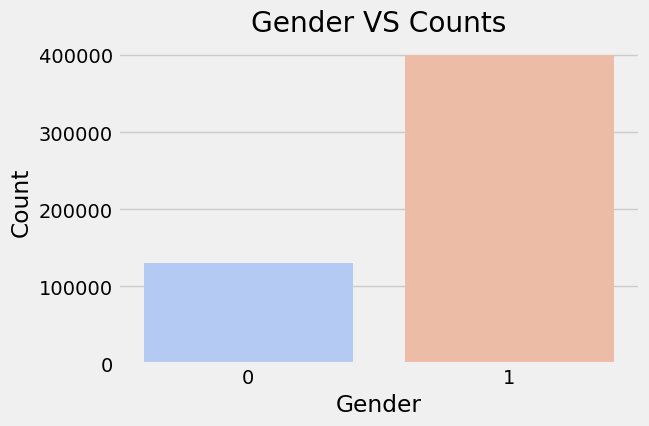

In [147]:
#Gender vs Count Plot
#'F': 0, 'M': 1

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
Gender_count = data["Gender"].value_counts()
ax = sns.barplot(x=Gender_count.index, y=Gender_count.values, hue=Gender_count.index, palette="coolwarm", legend=False)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender VS Counts")

Text(0.5, 1.0, 'Age VS Counts')

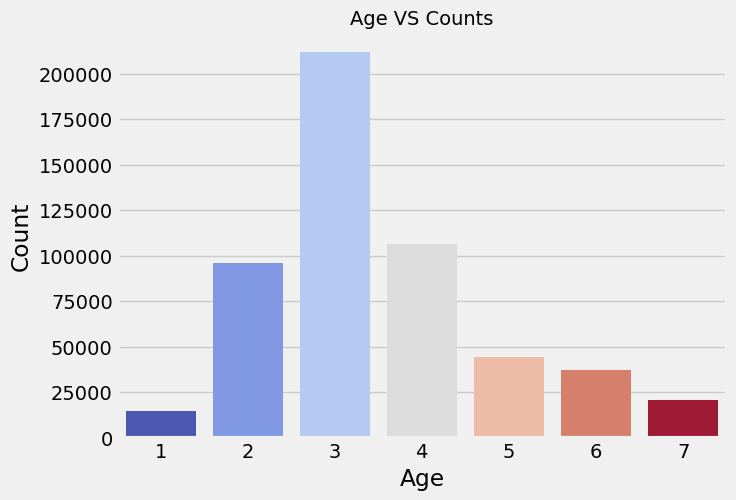

In [159]:
# Age vs Count Plot

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
Age_count = data["Age"].value_counts()
ax = sns.barplot(x=Age_count.index, y=Age_count.values, hue=Age_count.index, palette="coolwarm", legend=False)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age VS Counts", fontsize=14)

Text(0.5, 1.0, 'Marital_Status VS Counts')

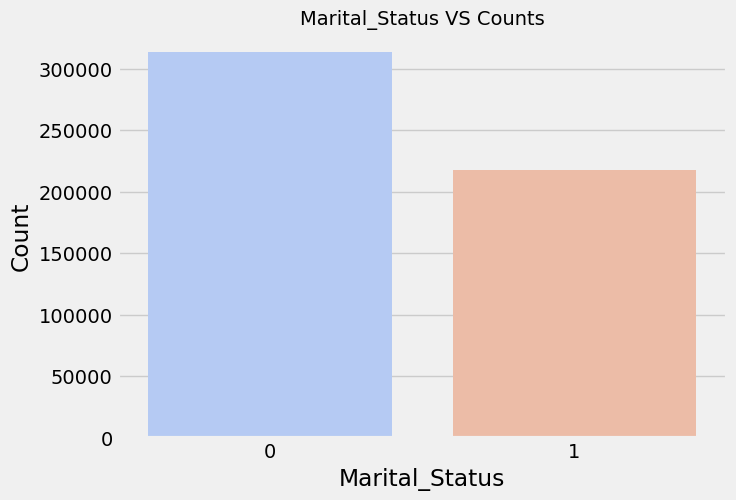

In [161]:
# Marital_Status vs Count Plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
Marital_Status_count = data["Marital_Status"].value_counts()
ax = sns.barplot(x=Marital_Status_count.index, y=Marital_Status_count.values, hue=Marital_Status_count.index, palette="coolwarm", legend=False)

plt.xlabel("Marital_Status")
plt.ylabel("Count")
plt.title("Marital_Status VS Counts",fontsize=14)

Text(0.5, 1.0, 'City_Category VS Counts')

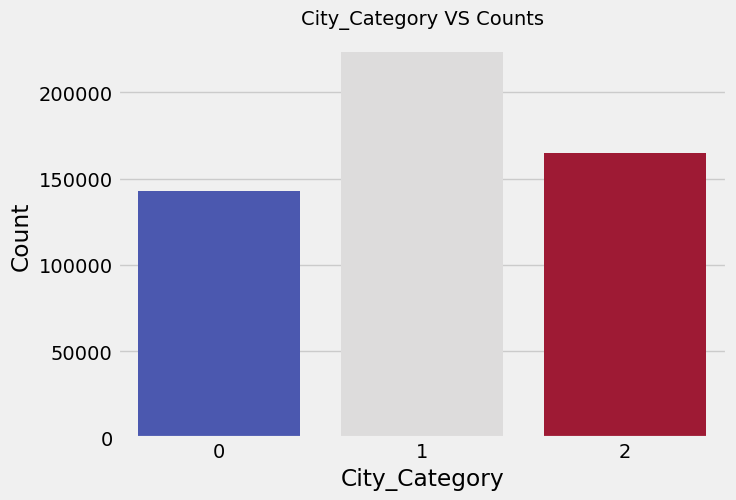

In [163]:
# Gender vs Count Plot

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
City_Category_count = data["City_Category"].value_counts()
ax = sns.barplot(x=City_Category_count.index, y=City_Category_count.values, hue=City_Category_count.index, palette="coolwarm", legend=False)

plt.xlabel("City_Category")
plt.ylabel("Count")
plt.title("City_Category VS Counts", fontsize=14)

Text(0.5, 1.0, 'Purchase Distribution with KDE')

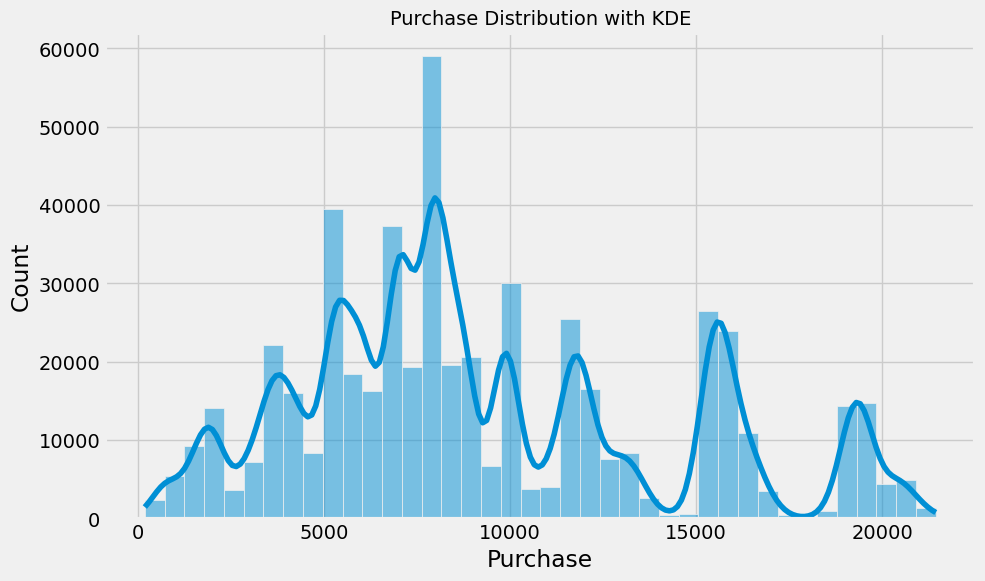

In [165]:
# Create a histogram for Purchase Distribution with KDE plot 

plt.figure(figsize=(10,6))
sns.histplot(data['Purchase'],bins=40,kde=True)
plt.title("Purchase Distribution with KDE", fontsize=14)

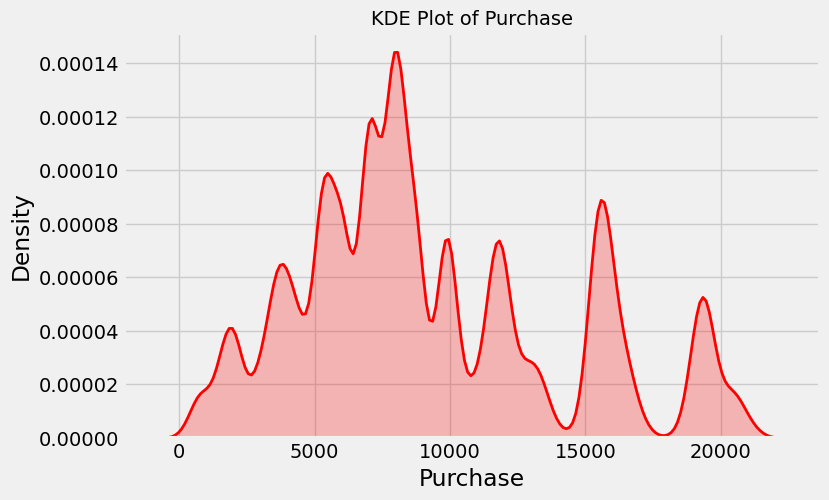

In [167]:
# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(9, 6))
# sns.distplot(data['Purchase'], bins=25)

#KDE plot of Purchase
plt.figure(figsize=(8, 5))
sns.kdeplot(data["Purchase"], fill=True, color="red", linewidth=2)  # fill=True shades the area


plt.xlabel("Purchase")
plt.ylabel("Density")
plt.title("KDE Plot of Purchase",fontsize=14)

# Show
plt.show()

Text(0.5, 1.0, 'Box Plot for Purchase')

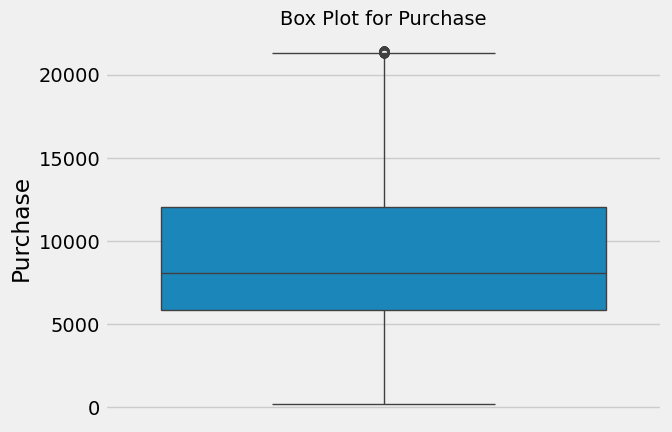

In [171]:
#Box Plot of Purchase column for Outlier detection

sns.boxplot(y=data['Purchase'])
plt.title("Box Plot for Purchase",fontsize=14)  

In [63]:
#Replacing Outliers with Statistical values(Imputation)

Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = data['Purchase'].median()
data['Purchase'] = np.where((data['Purchase'] < lower_bound) | (data['Purchase'] > upper_bound), median_value, data['Purchase'])


Text(0.5, 1.0, 'Box Plot for Purchase')

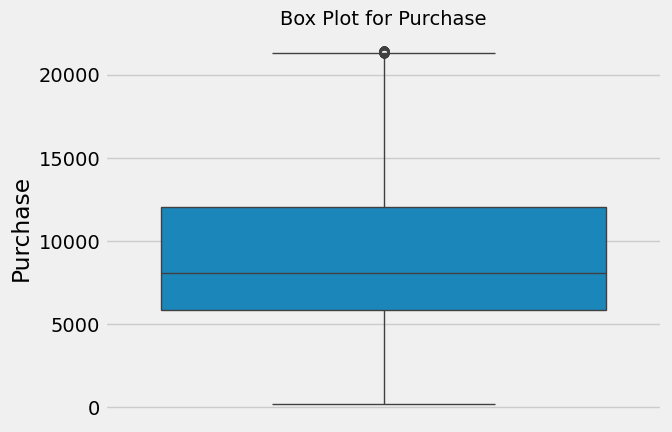

In [173]:
#By Using Boxplot rechacking the Outiers its remove or not

sns.boxplot(y=data['Purchase'])
plt.title("Box Plot for Purchase",fontsize=14)

### Bivariate Analysis

Text(0, 0.5, 'Purchase')

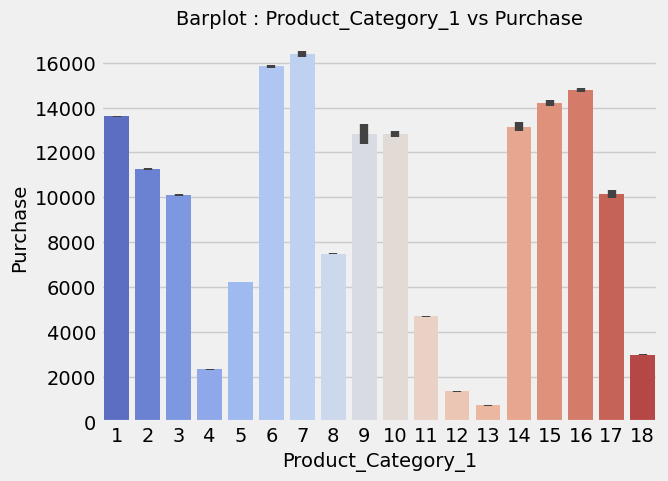

In [177]:
#Barplot : Product_Category_1 vs Purchase

sns.barplot(x = "Product_Category_1",y = "Purchase",palette="coolwarm", data = data)
plt.title("Barplot : Product_Category_1 vs Purchase", fontsize=14)
plt.xlabel("Product_Category_1",fontsize=14)
plt.ylabel("Purchase",fontsize=14)

Text(0, 0.5, 'Purchase')

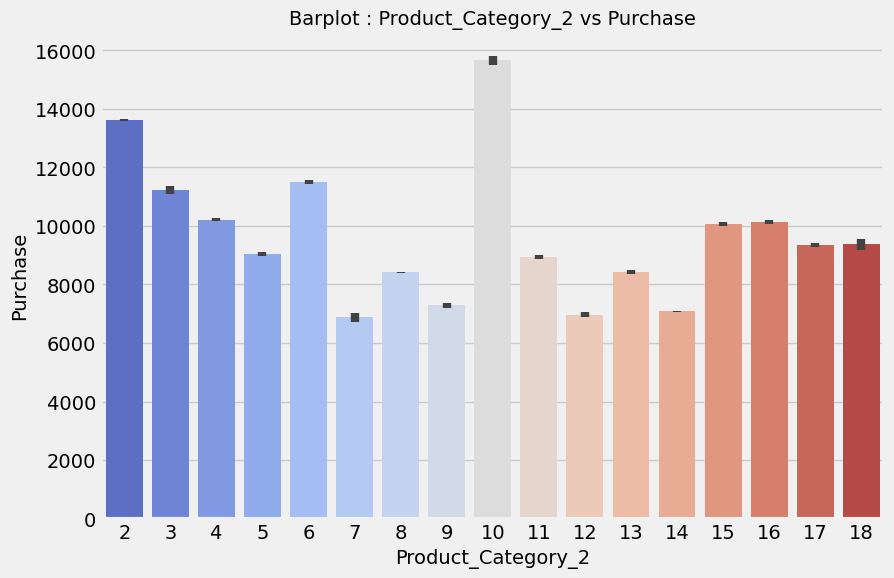

In [179]:
#Barplot : Product_Category_2 vs Purchase 

plt.figure(figsize=(9,6))
sns.barplot(x = "Product_Category_2",y = "Purchase",palette="coolwarm", data = data)
plt.title("Barplot : Product_Category_2 vs Purchase",fontsize=14)
plt.xlabel("Product_Category_2",fontsize=14)
plt.ylabel("Purchase",fontsize=14)

Text(0, 0.5, 'Purchase')

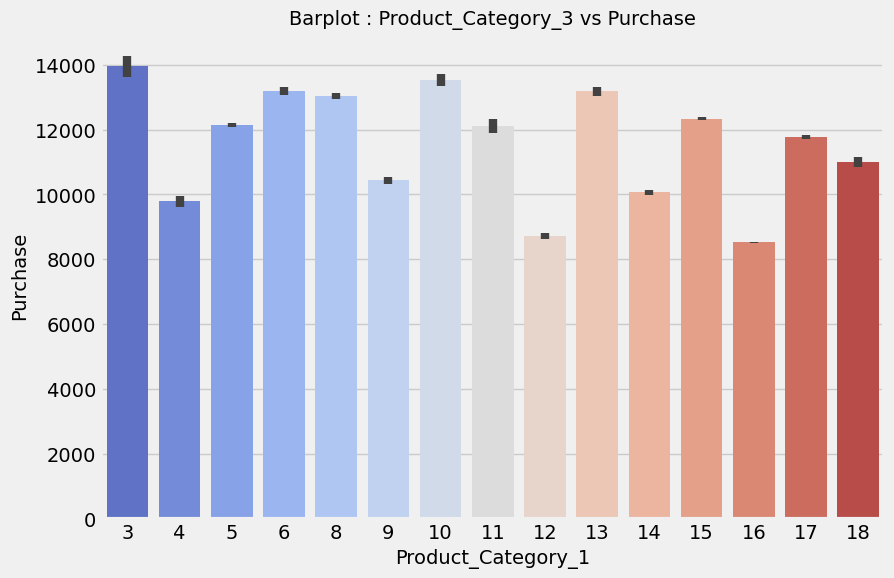

In [181]:
#Barplot : Product_Category_3 vs Purchase

plt.figure(figsize=(9,6))
sns.barplot(x = 'Product_Category_3', y = 'Purchase',palette="coolwarm", data = data)
plt.title("Barplot : Product_Category_3 vs Purchase",fontsize=14)
plt.xlabel("Product_Category_1",fontsize=14)
plt.ylabel("Purchase",fontsize=14)

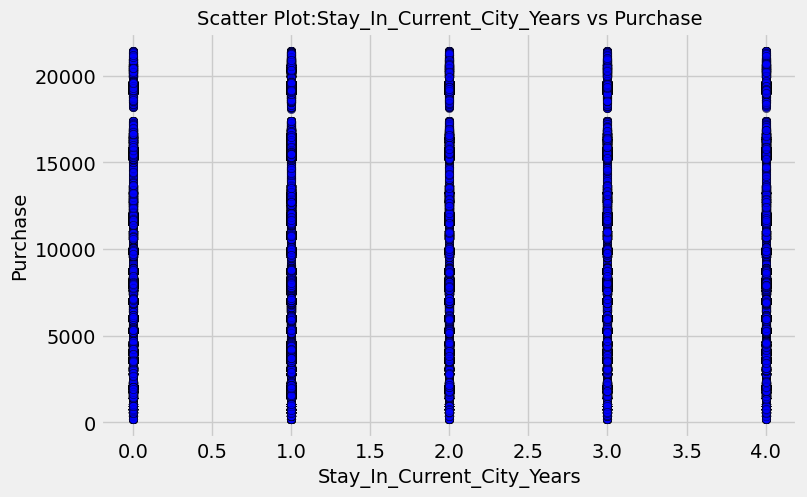

In [185]:
#Scatter Plot:Stay_In_Current_City_Years vs Purchase

plt.figure(figsize=(8, 5))
plt.scatter(data["Stay_In_Current_City_Years"], data["Purchase"], alpha=0.6, color="blue", edgecolors="black")
plt.xlabel("Stay_In_Current_City_Years",fontsize=14)
plt.ylabel("Purchase",fontsize=14)
plt.title("Scatter Plot:Stay_In_Current_City_Years vs Purchase",fontsize=14)
plt.show()

Text(0.5, 1.0, 'Distribution of Purchase by Occupation')

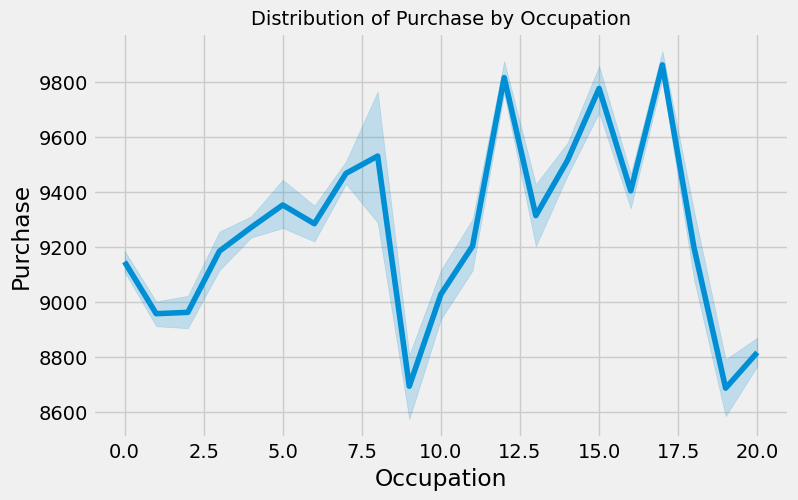

In [187]:
#Distribution of Purchase by Occupation

plt.figure(figsize=(8,5))
sns.lineplot(x=data['Occupation'],y=data['Purchase'])
plt.title("Distribution of Purchase by Occupation",fontsize=14)

### Multivariate Analysis

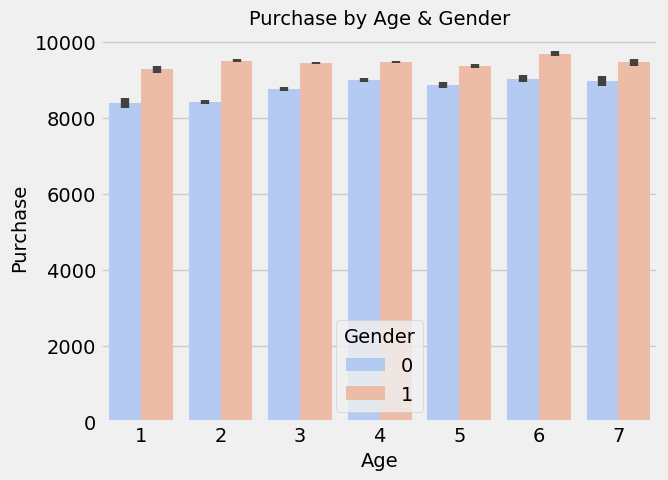

In [193]:
#Purchase by Age & Gender
sns.barplot(x='Age', y='Purchase', hue='Gender',palette="coolwarm", data=data)
plt.title("Purchase by Age & Gender",fontsize=14)
plt.xlabel("Age",fontsize=14)
plt.ylabel("Purchase",fontsize=14)
plt.show()

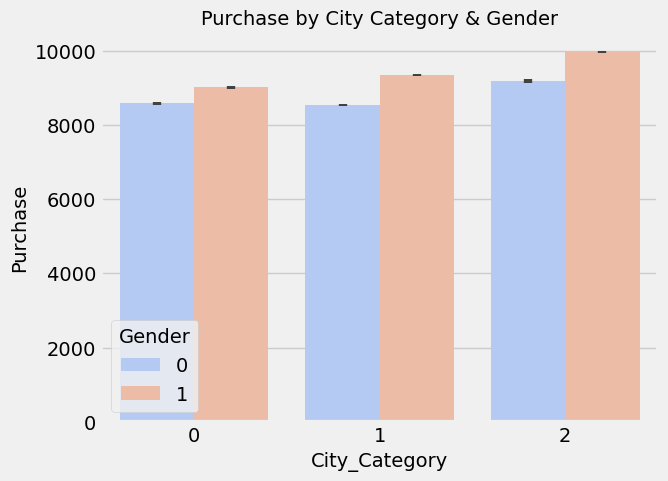

In [195]:
sns.barplot(x='City_Category', y='Purchase', hue='Gender',palette="coolwarm", data=data)
plt.title("Purchase by City Category & Gender",fontsize=14)
plt.xlabel("City_Category",fontsize=14)
plt.ylabel("Purchase",fontsize=14)
plt.show()

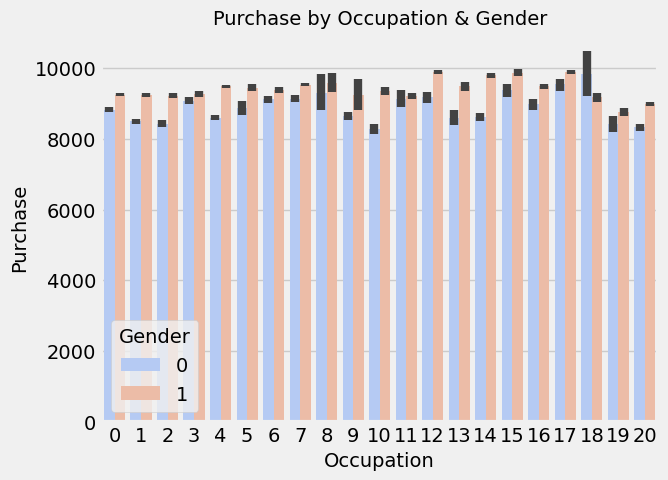

In [196]:
#Barplot: Occupation vs Purchase vs Gender

sns.barplot(x='Occupation',y='Purchase',hue='Gender',palette="coolwarm",data=data)
plt.title("Purchase by Occupation & Gender",fontsize=14)
plt.xlabel("Occupation",fontsize=14)
plt.ylabel("Purchase",fontsize=14)
plt.show()

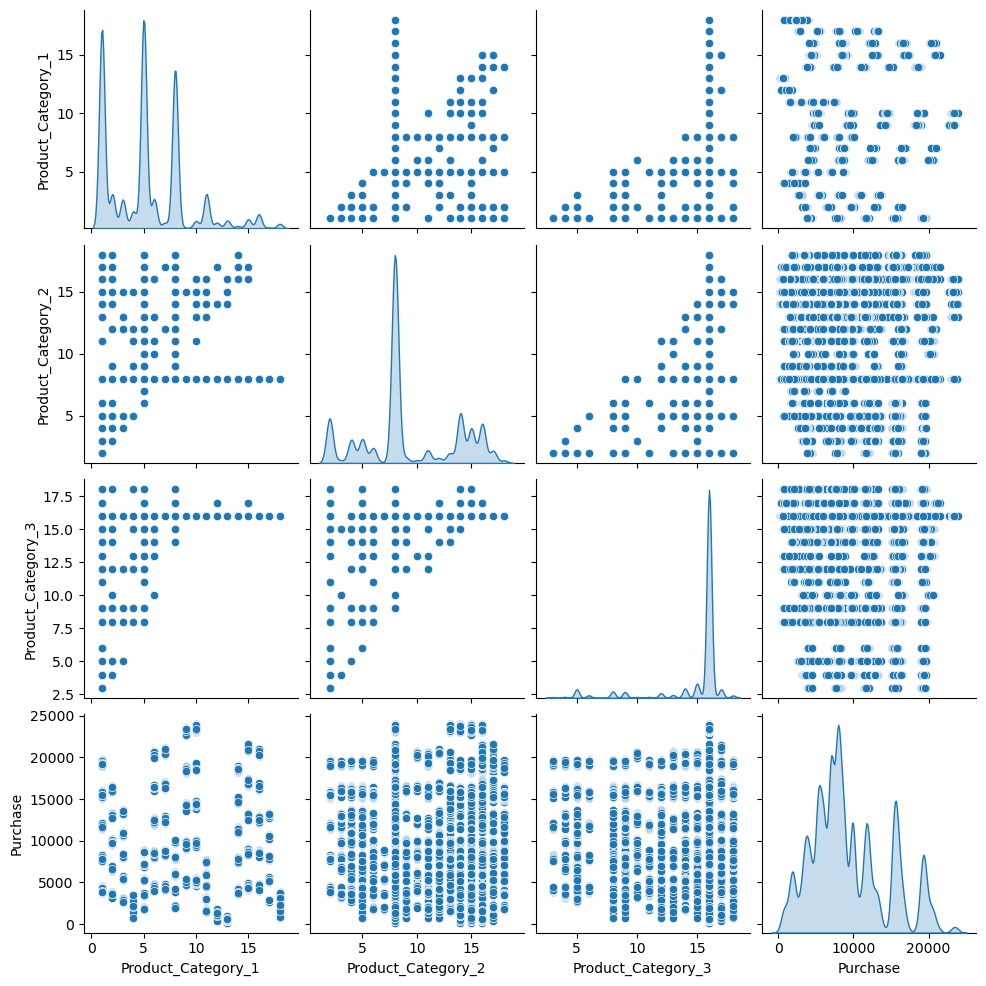

In [55]:
#PairPlot:
sns.pairplot(data[["Product_Category_1", "Product_Category_2","Product_Category_3","Purchase"]], diag_kind="kde", palette="coolwarm")
plt.show()

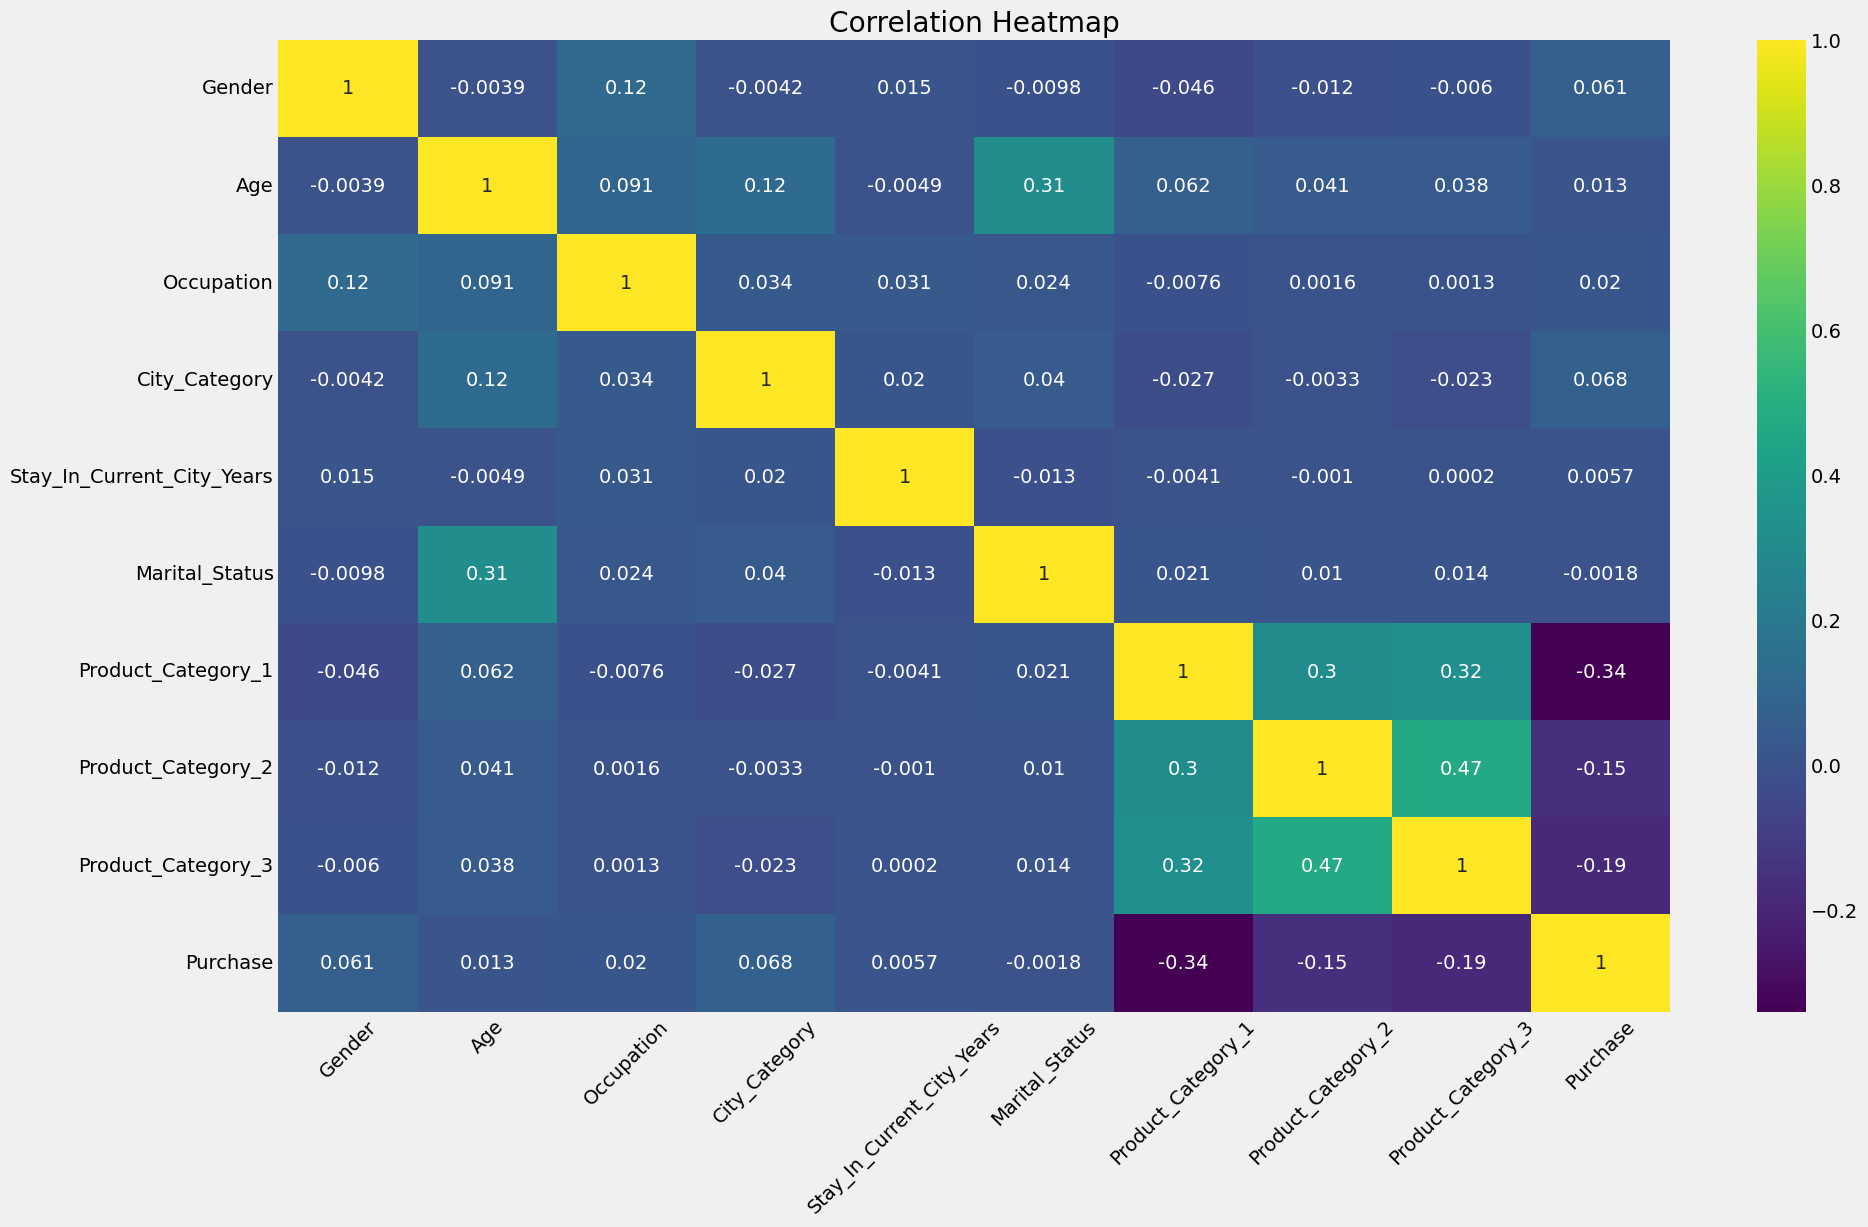

In [75]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.xticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()